In [6]:
# from scripts.FSC_dataframe import *

array([0.16666667, 0.33333333, 0.5       ])

# Five Sites

In [1]:
from scripts.FSC_dataframe import *

# %matplotlib ipympl

# dirpaths = ['../data_store/data/marcell_MN/']
dirpaths = ['../data_store/data/sodankyla_full/','../data_store/data/delta_junction/',
            '../data_store/data/marcell_MN/','../data_store/data/lacclair/','../data_store/data/torgnon/']
csvpath = 'snow_cam_details.csv'

for i, dirpath in enumerate(dirpaths):
    if i == 0:
        df = FSC_dataframe(dirpath, csvpath, width=.1, height=.1, graph_detail=0, threshold=5)
    else:
        df_ = FSC_dataframe(dirpath, csvpath, width=.1, height=.1, graph_detail=0, threshold=5)
        df = pd.concat([df, df_], axis=0)
df

KeyboardInterrupt: 

In [14]:
from scripts.FSC_dataframe import *

# df.to_pickle('five_sites_10km_thresh5.pkl')
# df_pure.to_pickle('five_sites_pure_5km.pkl')

df=pd.read_pickle('five_sites_10km_thresh5.pkl')
# df_pure=pd.read_pickle('five_sites_pure_10km.pkl')

In [15]:
# clean_df = df_pure[(df_pure['msw_flag'] < 2)&(df_pure['Confidence'] == 1)].reset_index(drop=True)
loc_df = df[(df['msw_flag'] < 2)&(df['Confidence'] == 1)].reset_index(drop=True)
loc_df

Location        Date       pvpg  mean_Eg_strong  mean_Eg_weak  \
0    sodankyla_full  14/12/2018   7.886090        0.129505           NaN   
1    sodankyla_full  12/01/2019   0.025292        4.606838      1.386696   
2    sodankyla_full  13/04/2019   0.898440        2.360225      0.791223   
3    sodankyla_full  25/04/2019   0.043012        2.903995      0.776180   
4    sodankyla_full  14/06/2019   1.078647        1.145379      0.261509   
..              ...         ...        ...             ...           ...   
138         torgnon  22/02/2022   6.432235        0.699155      0.316958   
139         torgnon  16/08/2022   2.246384        0.199356      0.182949   
140         torgnon  23/08/2022   4.027907        0.271801      0.030484   
141         torgnon  15/08/2023   4.665879        0.136729      0.079334   
142         torgnon  21/08/2023  33.573315        0.099591      0.030433   

     mean_Ev_strong  mean_Ev_weak  msw_flag  night_flag       asr  FSC  \
0          0.561569           NaN  0.900000         1.0  0.044068  1.0   
1          0.502049      0.276056  1.000000         1.0  0.415340  1.0   
2          0.402115      0.350415  1.000000         0.0  0.232612  1.0   
3          0.370318      0.269108  0.266234         0.0  0.284767  1.0   
4          0.615718      0.371426  0.220386         0.0  0.111695  0.0   
..              ...           ...       ...         ...       ...  ...   
138        1.874969      0.813733  0.328767         0.0  0.209392  1.0   
139        1.055428      0.802712  1.555556         1.0  0.049925  0.0   
140        1.047912      0.419722  0.042105         0.0  0.103140  0.0   
141        1.362073      0.934381  0.444444         1.0  0.064187  0.0   
142        0.918545      0.386625  0.602410         0.0  0.073012  0.0   

     Tree Snow  Joint Snow Confidence  Data Amount  
0          1.0         2.0        1.0           10  
1          0.0         1.0        1.0          508  
2          0.0         1.0        1.0          468  
3          0.0         1.0        1.0          308  
4          0.0         0.0        1.0          363  
..         ...         ...        ...          ...  
138        0.0         1.0        1.0           69  
139        0.0         0.0        1.0           36  
140        0.0         0.0        1.0           93  
141        0.0         0.0        1.0           99  
142        0.0         0.0        1.0           79  

[143 rows x 15 columns]

<Axes: >

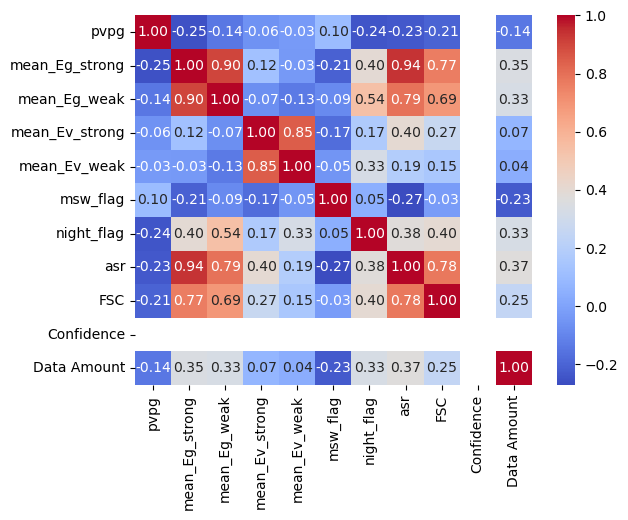

In [6]:
# Correlation heatmap
sns.heatmap(loc_df.drop(['Location','Date','Joint Snow','Tree Snow'],axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.savefig('./images/five_sites/10kmrad.png')

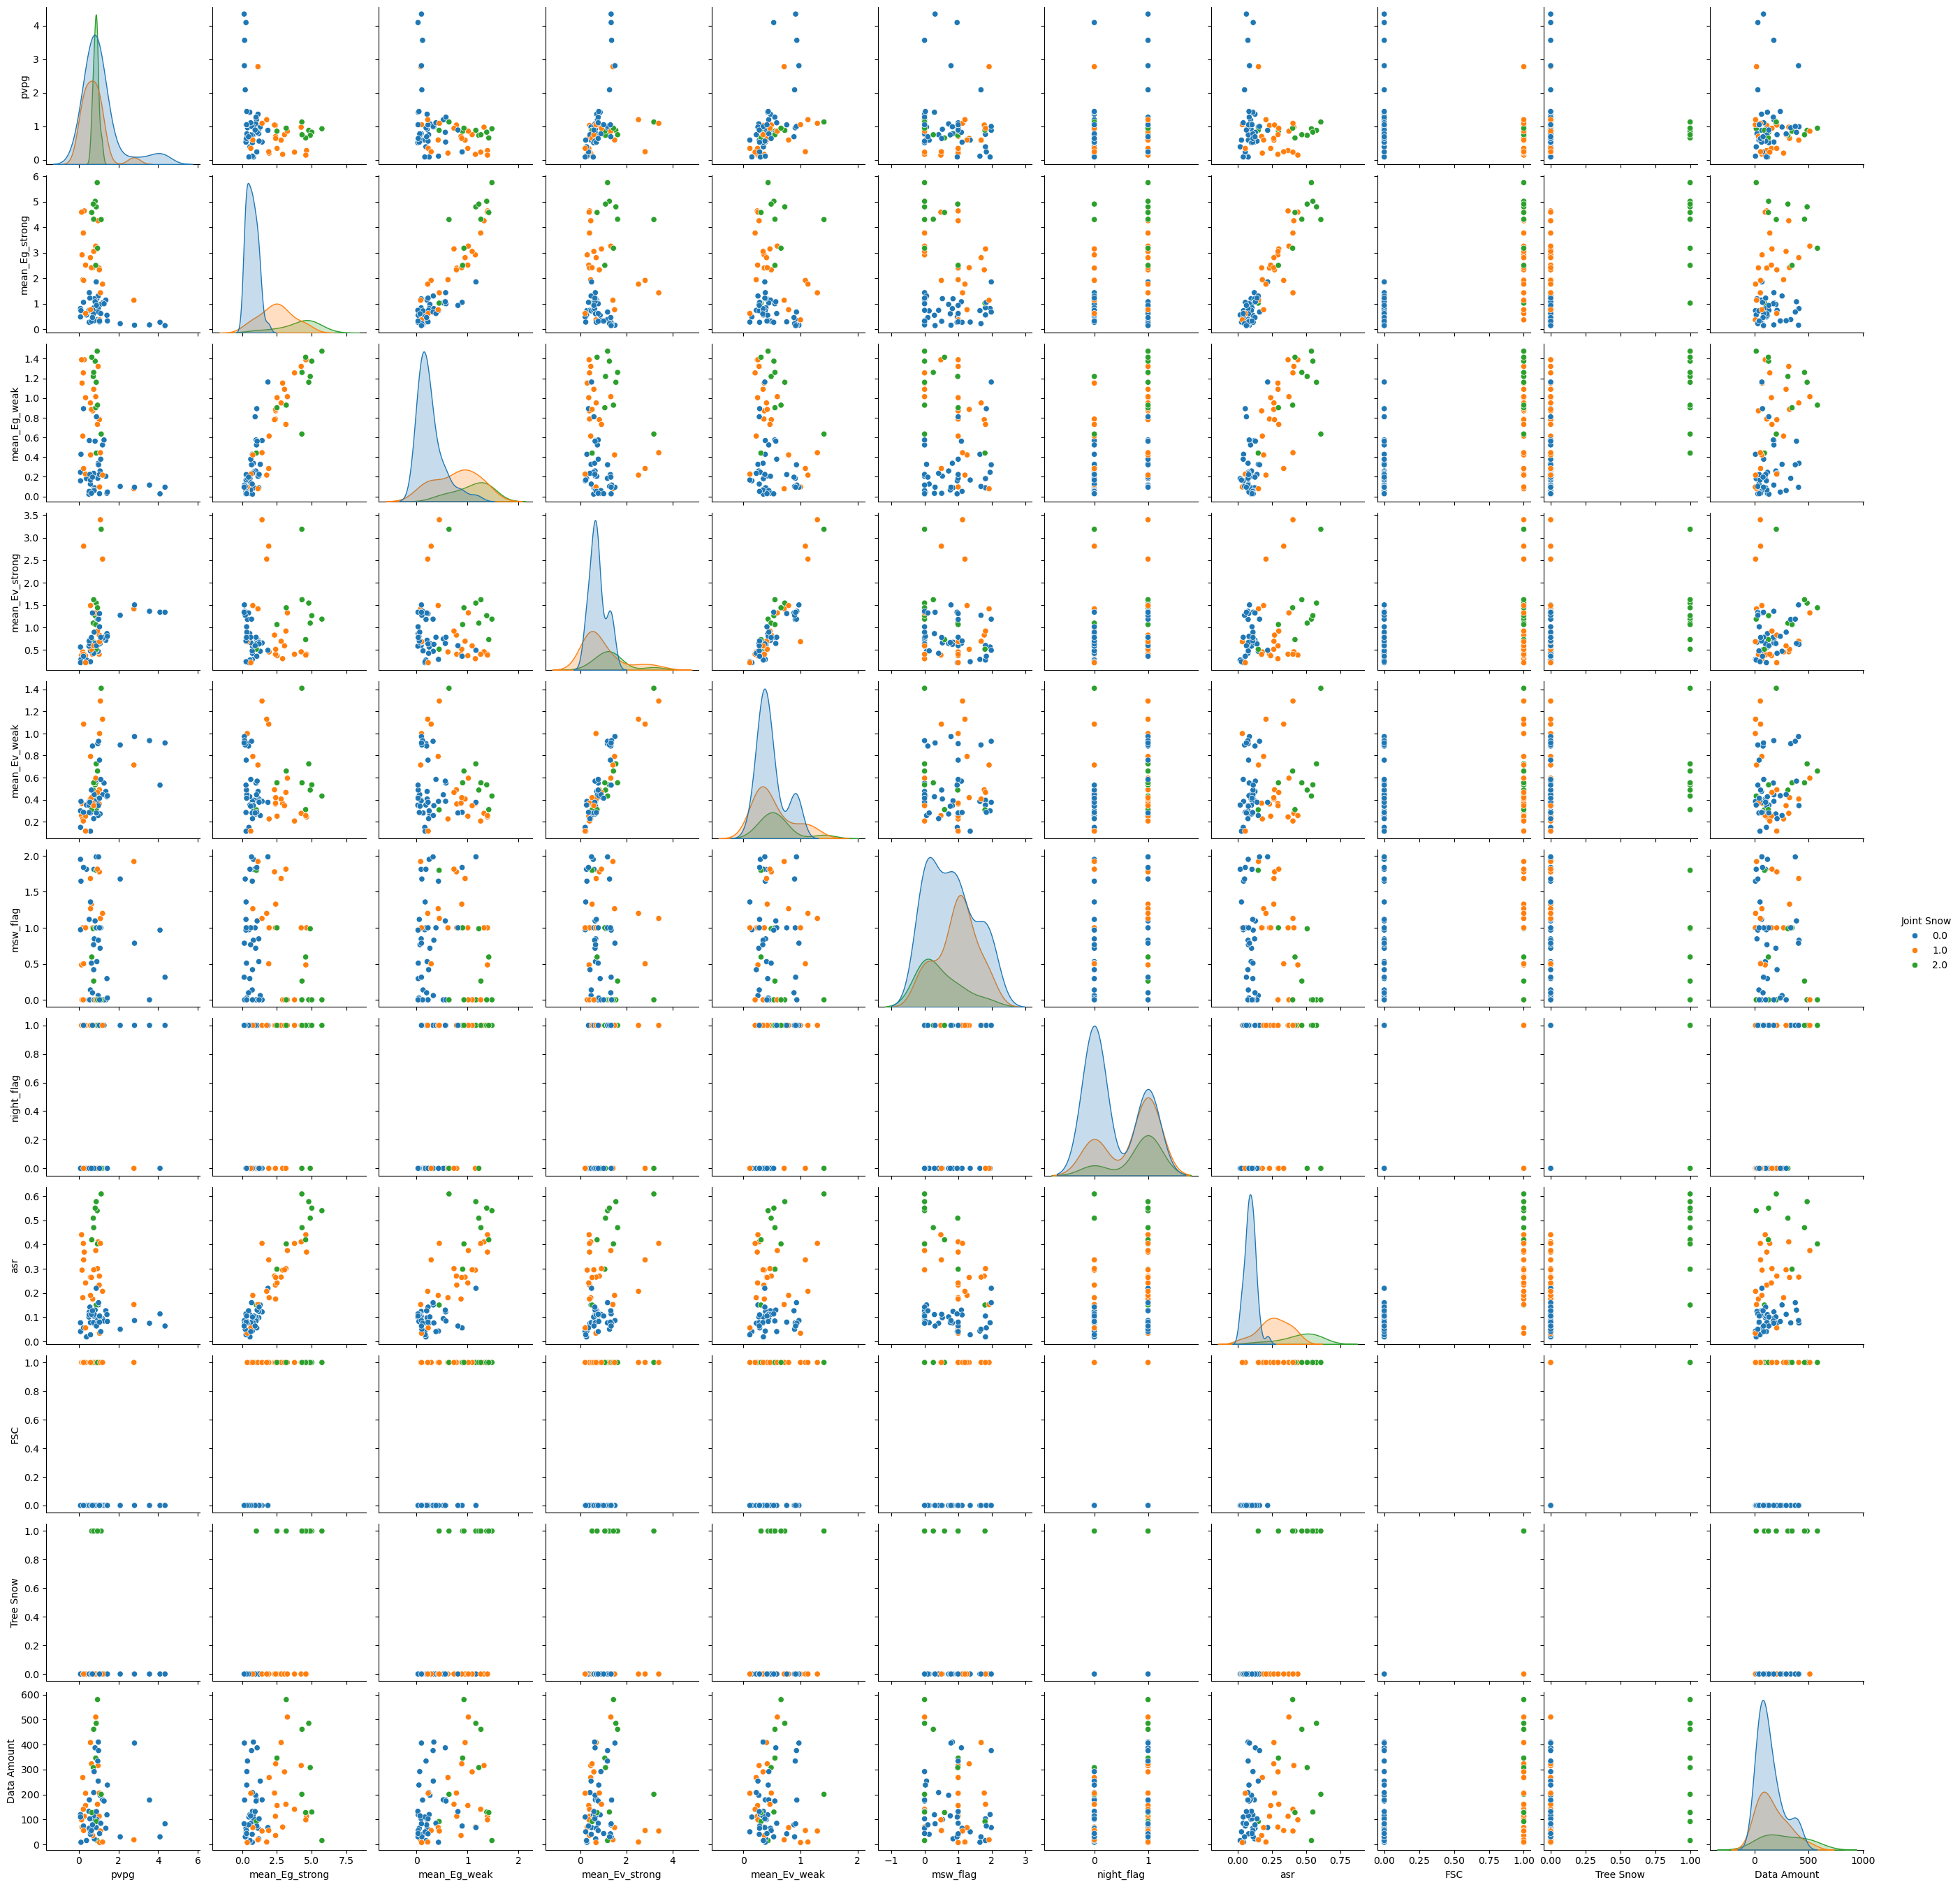

In [7]:
# Pairplot
hue = 'Joint Snow'

# setting the figure size
# width = 20
# height = 8
# sns.set(rc = {'figure.figsize':(width,height)})
sns.color_palette()
sns.pairplot(loc_df[loc_df['pvpg'] < 5], diag_kind='kde', hue=hue, palette='tab10')
# plt.savefig('./images/two_sites/30kmbox.png')

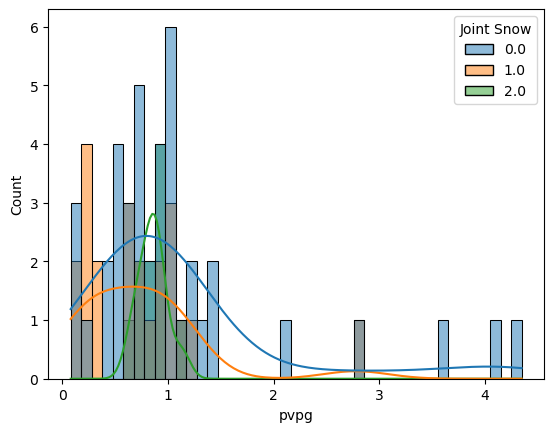

In [6]:
plt.figure()
sns.histplot(loc_df[(loc_df['pvpg']<5)], x='pvpg', hue='Joint Snow', kde=True, palette='tab10', binwidth=.1)
plt.show()
# plt.savefig('./images/five_sites/pvpg_5km.png')

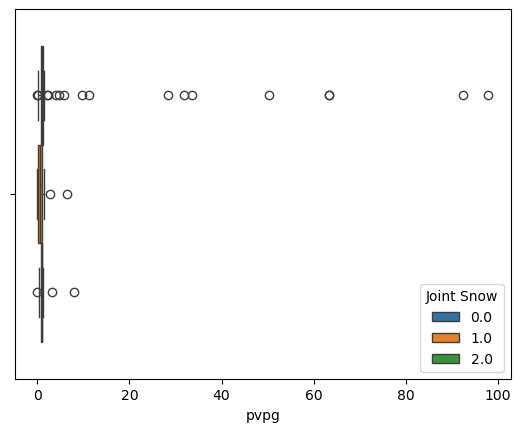

In [6]:
plt.figure()
sns.boxplot(loc_df[(loc_df['pvpg']<100)], x='pvpg', hue='Joint Snow', palette='tab10')
# plt.show()
plt.savefig('./images/five_sites/pvpg_10km_boxplot100.png')

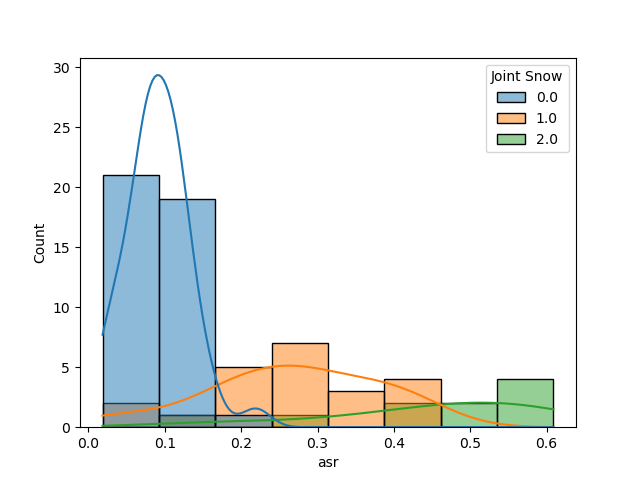

In [93]:
plt.figure()
sns.histplot(loc_df[loc_df['pvpg']<5], x='asr', hue='Joint Snow', kde=True, palette='tab10')
plt.show
# plt.savefig('./images/five_sites/asr_5km.png')

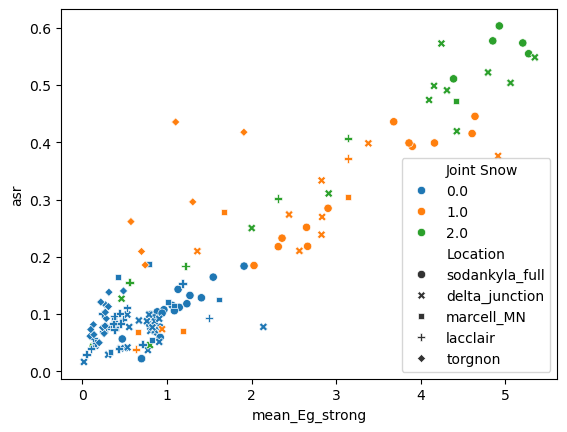

In [17]:
sns.scatterplot(loc_df, x='mean_Eg_strong', y = 'asr' ,hue='Joint Snow', palette='tab10', style='Location')
plt.legend(loc='lower right')
# plt.savefig('./images/five_sites/10km_asr_Eg.png')
plt.show()

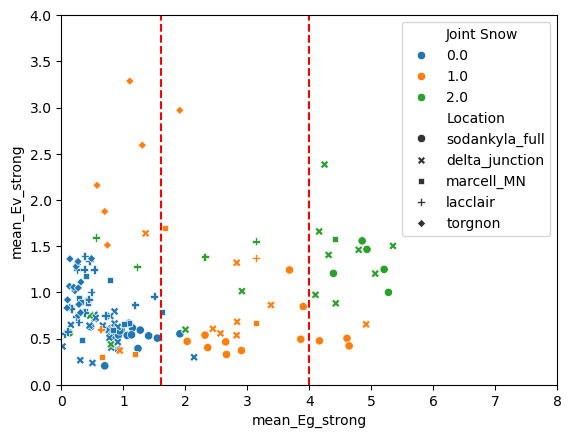

In [18]:
# %matplotlib ipympl

plt.figure()
sns.scatterplot(loc_df, x='mean_Eg_strong', y = 'mean_Ev_strong' ,hue='Joint Snow', palette='tab10', style='Location',
               legend='brief')
plt.plot([1.6,1.6],[0,4], 'r--')
plt.plot([4,4],[0,4], 'r--')
plt.legend(loc='upper right')
plt.xlim(0,8)
plt.ylim(0,4)
plt.savefig('./images/five_sites/10km_scatter_Eg.png')
plt.show()


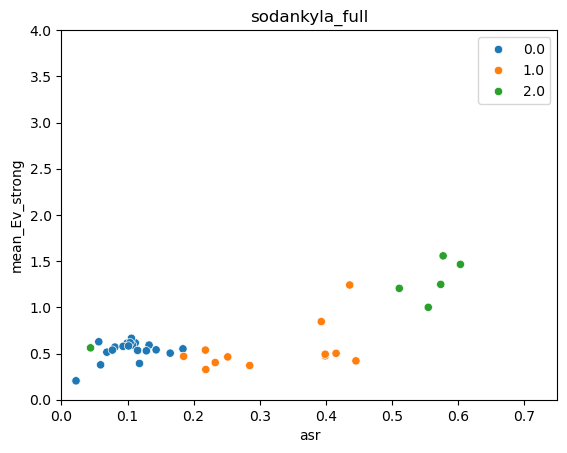

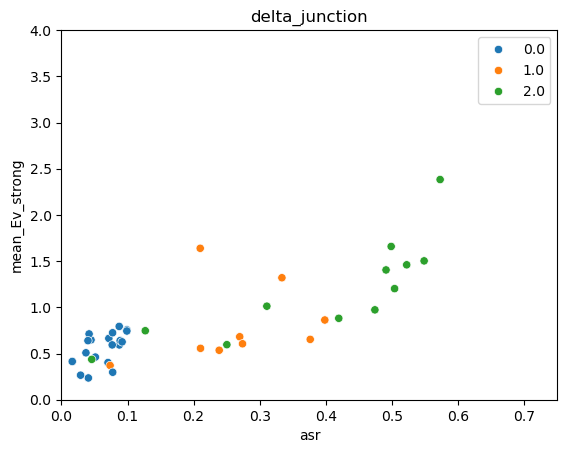

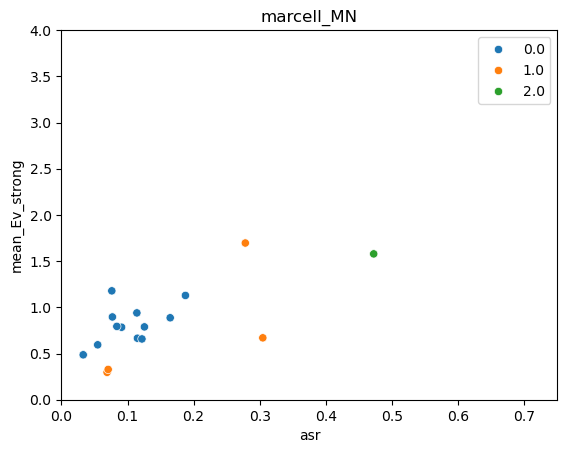

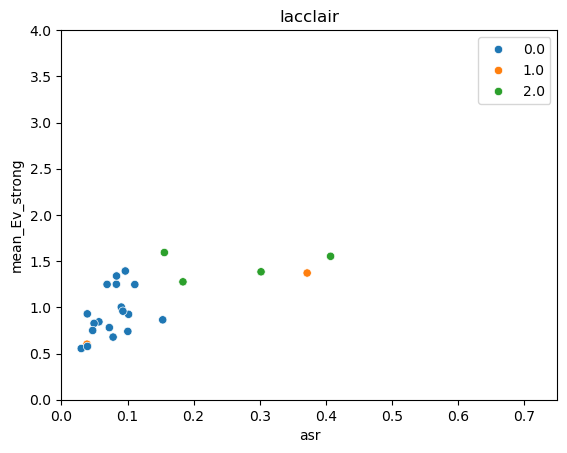

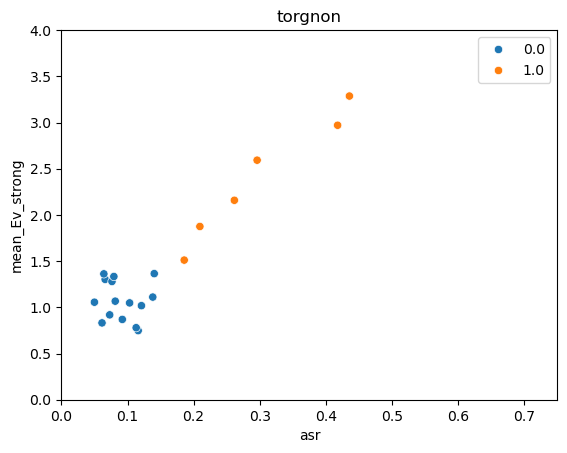

In [4]:
for a in ['sodankyla_full','delta_junction','marcell_MN','lacclair','torgnon']:

    plt.figure()
    sns.scatterplot(loc_df[loc_df['Location'] ==a], x='asr', y = 'mean_Ev_strong' ,
                    hue='Joint Snow', palette='tab10', legend='brief')
    plt.legend(loc='upper right')
    plt.title(a)
    plt.xlim(0,.75)
    plt.ylim(0,4)
    plt.show()
    # plt.savefig(f'./images/five_sites/{a}_scatter_5km.png')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def plot_confusion_matrix(true_labels, predicted_labels, classes):
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix\nAccuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(accuracy, precision, recall))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

# Example usage:
# true_labels = [0, 1, 0, 1, 1, 0]
# predicted_labels = [0, 1, 1, 1, 1, 0]
# plt.savefig(

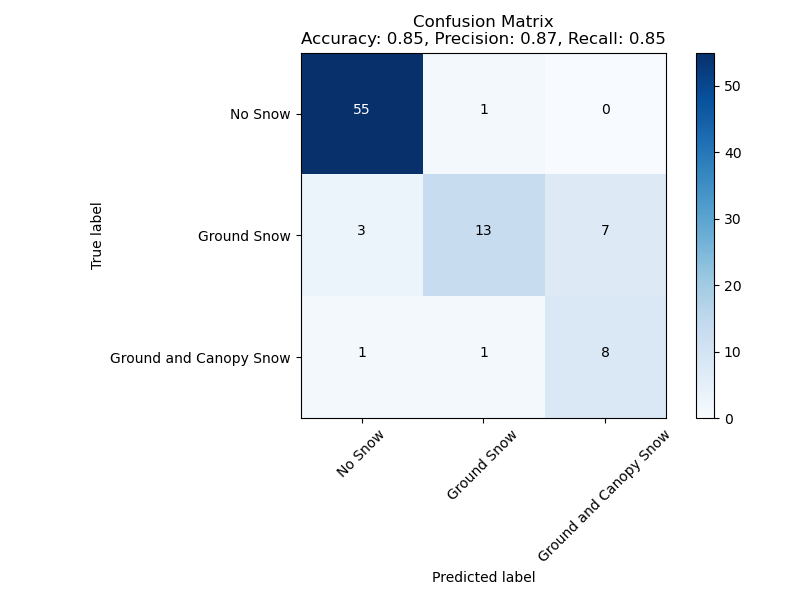

In [70]:
from sklearn.metrics import confusion_matrix
import pandas as pd

truth = loc_df['Joint Snow'].values

# Assuming clean_df is your DataFrame

def assign_value(row):
    if row['asr'] < 0.175:
        return 0
    elif row['mean_Ev_strong'] < .88:
        return 1
    else:
        return 2

prediction = loc_df.apply(lambda row: assign_value(row), axis=1).values

classes = ['No Snow', 'Ground Snow', 'Ground and Canopy Snow']
plot_confusion_matrix(truth, prediction, classes)
# plt.savefig('./images/five_sites/confusion10km.png')

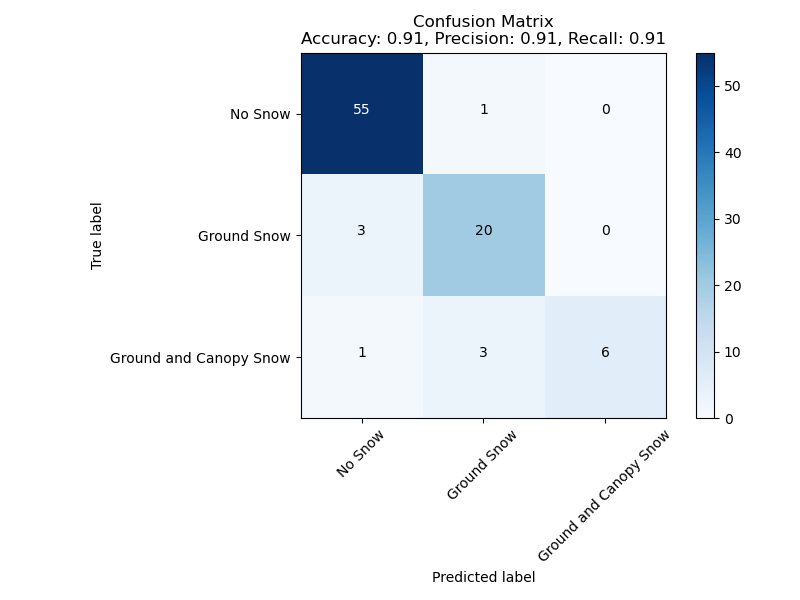

In [75]:
from sklearn.metrics import confusion_matrix
import pandas as pd

truth = loc_df['Joint Snow'].values

# Assuming clean_df is your DataFrame

def assign_value(row):
    if row['asr'] < 0.175:
        return 0
    elif row['asr'] < .45:
        return 1
    else:
        return 2

prediction = loc_df.apply(lambda row: assign_value(row), axis=1).values

classes = ['No Snow', 'Ground Snow', 'Ground and Canopy Snow']
plot_confusion_matrix(truth, prediction, classes)
# plt.savefig('./images/five_sites/confusion5km.png')

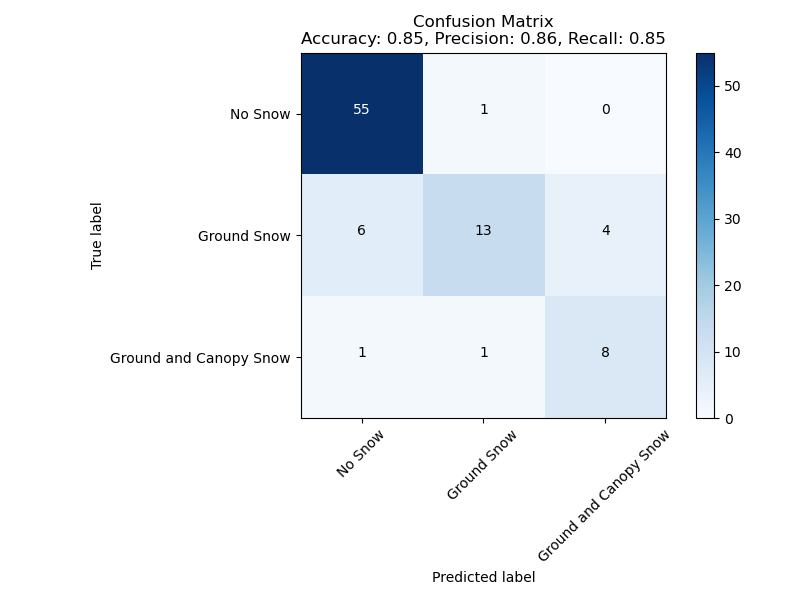

In [72]:
from sklearn.metrics import confusion_matrix
import pandas as pd

truth = loc_df['Joint Snow'].values

# Assuming clean_df is your DataFrame

def assign_value(row):
    if row['mean_Eg_strong'] < 1.65:
        return 0
    elif row['mean_Ev_strong'] < .88:
        return 1
    else:
        return 2

prediction = loc_df.apply(lambda row: assign_value(row), axis=1).values

classes = ['No Snow', 'Ground Snow', 'Ground and Canopy Snow']
plot_confusion_matrix(truth, prediction, classes)
# plt.savefig('./images/five_sites/confusion10km.png')